In [1]:
from tensorflow.keras.datasets import cifar100
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [3]:
print(f"X Train Boyut: {X_train.shape}")
print(f"X Test Boyut: {X_test.shape}")

X Train Boyut: (50000, 32, 32, 3)
X Test Boyut: (10000, 32, 32, 3)


In [4]:
X_train[0].shape

(32, 32, 3)

In [5]:
print(f"Y Train Boyut: {y_train.shape}")
print(f"Y Test Boyut: {y_test.shape}")

Y Train Boyut: (50000, 1)
Y Test Boyut: (10000, 1)


In [6]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [7]:
print(f"Y Train Boyut: {y_train.shape}")
print(f"Y Test Boyut: {y_test.shape}")

Y Train Boyut: (50000,)
Y Test Boyut: (10000,)


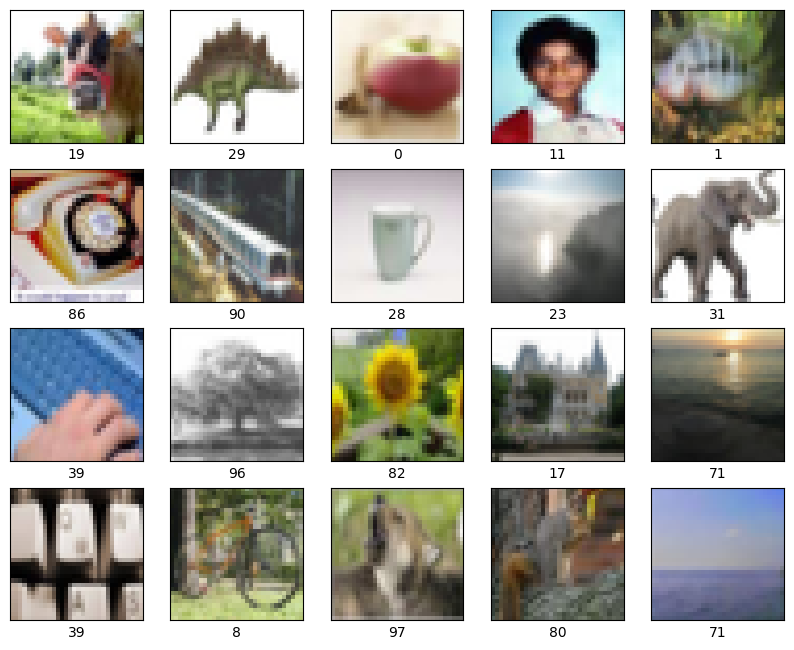

In [8]:
plt.figure(figsize=(10,10))
for image in range(0,20):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_pilot=X_train[j]
    plt.imshow(data_pilot)
    plt.xlabel(str(y_train[j]))
plt.show()

In [9]:
X_train = X_train/255.0
X_test=X_test/255.0

In [10]:
model = Sequential()

model.add(Conv2D(input_shape=(X_train[0].shape),kernel_size=(2,2),padding="same",strides=(2,2),filters=32))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding="same"))

model.add(Conv2D(kernel_size=(2,2),padding="same",strides=(2,2),filters=64))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding="same"))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(100,activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 256)               1

In [12]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [13]:
%%time
history=model.fit(X_train,y_train,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 32s 20ms/step - loss: 3.4330 - accuracy: 0.1860
Epoch 2/25
1563/1563 [==============================] - 31s 20ms/step - loss: 2.7121 - accuracy: 0.3138
Epoch 3/25
1563/1563 [==============================] - 31s 20ms/step - loss: 2.3561 - accuracy: 0.3885
Epoch 4/25
1563/1563 [==============================] - 30s 19ms/step - loss: 2.0722 - accuracy: 0.4482
Epoch 5/25
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8201 - accuracy: 0.5064
Epoch 6/25
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5779 - accuracy: 0.5627
Epoch 7/25
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3572 - accuracy: 0.6141
Epoch 8/25
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1499 - accuracy: 0.6636
Epoch 9/25
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9573 - accuracy: 0.7149
Epoch 10/25
1563/1563 [==============================] - 30s 19m

In [14]:
test_loss,test_acc=model.evaluate(X_train,y_train)

1563/1563 [==============================] - 8s 5ms/step - loss: 0.2199 - accuracy: 0.9292


In [15]:
print(f"Test Accuracy: {test_acc}")

Test Accuracy: 0.9291599988937378


1563/1563 [==============================] - 8s 5ms/step


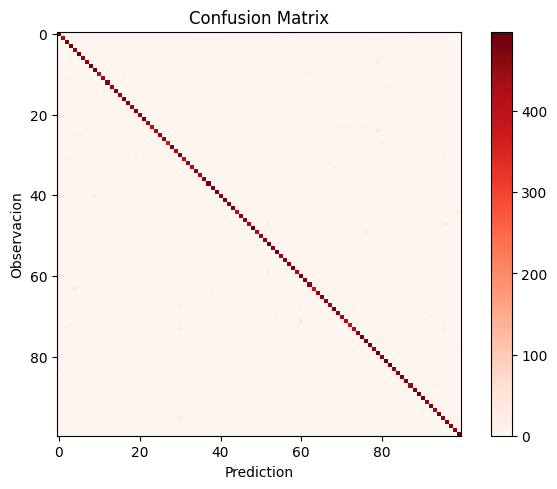

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title="Confusion Matrix",
                          cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    plt.tight_layout()
    plt.ylabel("Observacion")
    plt.xlabel("Prediction")

y_pred = model.predict(X_train)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_matrix_data = confusion_matrix(y_train, y_pred_classes)
plot_confusion_matrix(confusion_matrix_data, classes=range(100))
